Modelos estocásticos de precios
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/series-de-tiempo/blob/master/08-R-modelado-precios.ipynb) para acceder a la última versión online

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/series-de-tiempo/blob/master/08-R-modelado-precios.ipynb) para ver la última versión online en `nbviewer`. 

---

# Medidas de cambio en el precio de un activo.


* Cambio Absoluto ${(D_t)}$ : $D_t = P_t - P_{t-1}$


* Rentabilidad bruta simple: $1+ R_t = P_t / P_{t-1}$


* Rentabilidad neta simple: $R_t = (P_t - P_{t-1}) / P_{t-1} = (P_t/P_{t-1}) - 1 $


* Rentabilidad logarítmica: $r_t = \log (P_t / P_{t-1}) = log(1+R_t)$

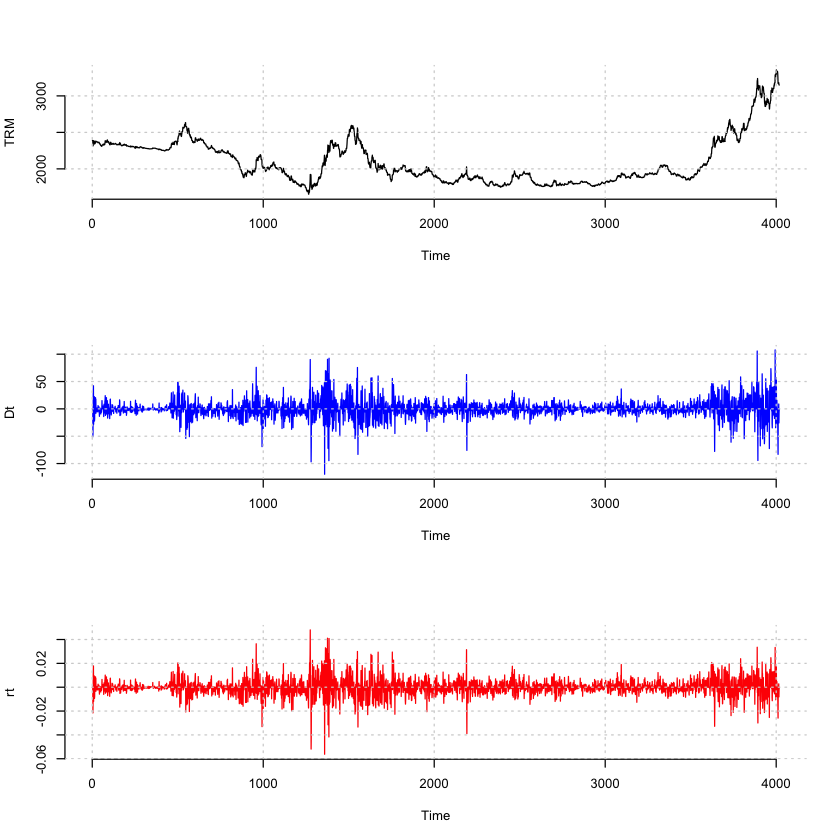

In [4]:
## calculo de cambio absoluto sobre la TRM
trm <- read.table("data/trm.dat", dec=",")$V1                      # lectura TRM
Dt  <- c(NaN, diff(trm))                                           # cambio absoluto
rt  <- c(NaN, log(trm[2:length(trm)] / trm[1:(length(trm) - 1)] )) # rentabilidad logaritmica      

options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(3,1))

plot.ts( trm,  ylab = 'TRM', bty = 'n' );            grid()
plot.ts( Dt,   ylab = 'Dt',  bty = 'n', col="blue"); grid()
plot.ts( rt,   ylab = 'rt',  bty = 'n', col="red");  grid()

El análisis de la distribución de probabilidades de los rendimientos es fundamental en el modelado de precios: 


* Describe la probabilidad de que un rendimiento tome un valor determinado.


* Crea un punto de referencia del comportamiento de un mercado.


* Permite evaluar modelos de precios contra el punto de referencia.


* Permite comparar modelos.

# Modelo general de precios de un activo

Existen componentes deterministicas en la estructura de los precios:

$$P_t = f(t)+ x_t  ~~\text{o}~~ x_t = P_t - f(t)$$

donde:


* $P_t$ es el precio; puede ser reemplazado por $p_t = \log(P_t)$.


* $f(t)$ es la componente determinística que incluye tendencia, ciclos de largo plazo, efectos calendario, etc.


* $x_t$ es un proceso estocástico continuo

### Modelo de paseo aleatorio con estados discretos

Sea $n$ la cantidad de pasos dados por una partícula en una unidad de tiempo y $v_n$ la distancia total recorrida. Cada paso tiene una longitud $\delta$ y probabilidades $p$ y $q$ (con $p$ + $q$ = 1) de que sea positivo (hacia arriba) o negativo respectivamente. 

<img src="images/paseo-aleatorio.jpg" width=500>

La distancia recorrida por la partícula en una unidad de tiempo será:

$$\mu = E[v_n] = n~(p-q)~\delta$$

y la varianza:

$$\sigma^2=V[v_n] = 4~npq~\delta^2$$

Por el Teorema del Límite Central, si $u$ = $v_n$, entonces $u$ tiende a una distribución normal con media $\mu$ y varianza $\sigma^2$.   

# Paseo aleatorio continuo

Si: 

* $F$ es una distribución cualquiera con media $\mu$ y varianza $\sigma^2$.


* $u_i$ es un valor muestral obtenido de $F$.


* $x_0$ es un punto inicial arbitrario.

entonces la secuencia $x_0, ~x_1, ...$ es un paseo aleatorio con pasos $u_i$. En este caso, $x_t = x_0 + u_1 + ...+ u_t$.

En este caso:


* $\mu$ es la deriva (drift).


* $\sigma$ es la volatilidad (desviación estándar).

$$E(x_t|x_0) = x_0 + \mu~t$$

$$V(x_t|x_0) = \sigma^2~t$$

$$(x_t | x_0) \sim N(x_0+\mu~t, \sigma^2~t)$$

# Proceso Browniano con deriva o proceso de Wiener

Se define cuando en la secuencia $x_0,~x_1,~x_2,...$:

$$x_t - x_{t-1} \sim N(\mu, \sigma^2)$$

### Simulación

**Ejercicio.--** Grafique una realización de este proceso con $T$ = 200, $\mu$ = 0 y $\sigma$ = 0.1. 

**Ejercicio.--** Grafique una realización de este proceso con $T$ = 200, $\mu$ = 0.5 y $\sigma$ = 0.1.

### Pronóstico

**Ejercicio.--** Para los dos ejercicios anteriores, haga el pronóstico para $t$ = 100 y grafique los intervalos de confianza para una desviación estándar.

### Estimación y diagnóstico.

**Ejercicio.--** Explique como se estiman los parámetros.

**Ejercicio.--** Explique como se diagnostica el modelo y ejemplifique.

# Proceso Browniano estándar

Es un proceso de Wiener con $\mu = 0$ y $\sigma = 1$. En este caso:

$$x_t = x_{t-1} + z_t$$

y $z_t$ sigue una distribución normal estandar.

# Proceso Browniano con tendencia

Modelo continuo:
$$dx_t=μ*dt+σ*dz_t$$


Modelo discreto:
$$x_t=x_{t-1}+μ +σ*ε_t$$


Interpretación: Si $x_t=P_t$, entonces:
$x_t-x_{t-1}=P_t-P_{t-1}=D_t$  ~ $N[μ,σ^2 ]$

### Simulación

**Ejercicio.--** Grafique una realización de este proceso con $x_0$ = 5, $T$ = 200, $\mu$ = 0.4 y $\sigma$ = 0.1. 

### Pronostico $h$ periodos adelante

$x_{t+h}-x_t=(x_{t+h}-x_{t+h-1} )+⋯+(x_{t+1}-x_t )=$ $\sum_{i=1}^{h} D_{t+i} $

$x_{t+h}-x_t$   ~   $N[μh,σ^2 h]$

$x_{t+h}=x_t+μh+σε_{t+h} \sqrt{h}$

**Ejercicio.--** Grafique el pronóstico a partir de $t$ = 100, y los intervalos de confianza para una desviación estándar.

### Estimación y diagnóstico

Describa como se estima el modelo y como se diagnostica.

## Proceso Browniano geométrico o exponencial

$$x_t  = x_{t-1} * (\mu + \theta * z_t), ~~z_t \sim N(0,1) $$

**Ejercicio.--** Simule una serie con T = 200.

**Ejercicio.--** Grafique el pronóstico para $t$ = 100.

**Ejercicio.--** Explique como se estiman los parámetros y como se diagnostica.

## Proceso de Orstein-Uhlenbeck o reversión a la media

$$x_t = \theta_0 + \theta_1~x_{t-1} + \sigma~z_t$$ 


**Ejercicio.--** Simule una serie con T = 200.

**Ejercicio.--** Grafique el pronóstico para $t$ = 100.

**Ejercicio.--** Explique como se estiman los parámetros y se dianostica.

Modelos estocásticos de precios
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/series-de-tiempo/blob/master/08-R-modelado-precios.ipynb) para acceder a la última versión online

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/series-de-tiempo/blob/master/08-R-modelado-precios.ipynb) para ver la última versión online en `nbviewer`. 

---